# Machine Learning

In this lesson we will see how machine learning techniques can be successfully applied to solve financial problems. We will first do a quick tour on the theory behind neural networks and then we will see few examples of practical applications regarding regression and classification issues. 

**Disclaimer**: this lecture just scratches the surface of the machine learning topic which has seen a huge development in the latest years leading to thousands of applications in many different fields.

## Neural Network Definition
Artificial Neural Networks (ANN or simply NN) are information processing models that are developed by inspiring from the working principles of human brain. Their most essential property is the ability of learning from sample sets. 

The basic unit of ANN architecture are neurons which are internally in connection with other neurons. 

![Model of an artificial neuron.](neuron.jpeg)

A neuron consists of weights ($w_i$) and real numbers ($x_i$). All inputs injected into a neuron are individually weighted, added together (sometimes it is added also a bias $w_0$) and passed into the activation function which produce the neuron output

$$ \textrm{Inputs} = \sum_{i=1}^{N} x_i w_i +w_0 = \Sigma \rightarrow = f(\Sigma) \rightarrow \textrm{Output}$$  

There are many different types of activation function but one of the simplest is the *step function* which returns just 0 or 1 according to the input value (another is the *sigmoid* which can be thought of as the continuous version of the step function). 

![Sigmoid function.](sigmoid.png)

Other commonly used activation functions are Rectified Linear Unit (ReLU) and hyperbolic tangent (tanh).

For an deeper discussion of activation functions see [this article](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

## Training of a neuron

When teaching children how to recognize a bus, we just tell them, showing an example: “This is a bus. That is not a bus.” until they learn the concept of what a bus is. 
Furthermore, if the child sees new objects that she hasn’t seen before, we could expect her to recognize correctly whether the new object is a bus or not.

This is exactly the idea behind neurons.
Similarly, inputs from a *training* set are presented to the neuron one after the other together with the correct output and the neuron weights are modified accordingly.

When an entire pass through all of the input training vectors is completed (*epoch*) the neuron has learnt. Actually we can present many times the same set to the neuron to make it learn better.

At this time, if an input vector $\mathbf{x}$ (already in the training set) is given to the neuron, it will output the correct value. If $\mathbf{x}$ is not in the training set, the network will respond with an output similar to other training vectors close to $\mathbf{x}$.

This kind of training is called *supervised* because we have a set of training data with known targets and, during training, we want our model to learn to predict the target from the other variables. 

Unfortunately using just a neuron is not too useful since it is not possible to solve
the interesting problems we would like to face with just that simple architecture. The next step is then to put together more neurons in *layers*.

### Multilayered Neural Networks

![A multilayered neural network.](multilayer.jpeg)

In a multilayered NN each neuron from the *input layer* is fed up to each neuron in the next hidden layer, and from there to each neuron on the output layer. We should note that there can be any number of neurons per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer.

### Training a Multilayered Neural Network

The training of a multilayered NN follows these steps:

* present a training sample to the neural network (initialized with random weights $w_i$);
* compute the network output obtained by calculating activations of each layer;
* calculate the error (loss) as the difference between the NN predicted output and the target output;
* having calculated the error, re-adjust the weights of the network such that the difference with the target decreases;
* continue the process for all samples several times (epochs).

<img src="training_nn.png">

The NN error is computed by the *loss function*. Different loss functions will give different errors for the same prediction, and thus have a considerable effect on the performance of the model. Two are the main possible choices

* Mean Absolute Error (MAE): the average of the absolute value of the differences between the predictions and true values;
* Root Mean Squared Error (MSE): the square root of the average of the squared differences between the predictions and true values.

The mean absolute error is easily interpretable, as it represents how far off we are on average from the correct value. The root mean squared error penalizes larger errors more heavily and is commonly used in regression tasks. Either metrics may be appropriate depending on the situation and you can use both for comparison. [Here](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) is a discussion of the merits of these metrics.

The error or loss is a function of the internal parameters of the model (i.e the weights and bias). For accurate predictions, one needs to minimize the calculated error.
In a neural network, this is done using *back propagation* (see [this article](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd)). The current error is typically propagated backwards to a previous layer, where it is used to modify the weights and bias in such a way that the error is minimized.

<img src="loss_function.png">

The weights are modified using a function called Optimization Function (we will use *Adam* as optimizator in the following but there are more).

A common mistake to avoid is to *overtrain* a NN. Overtraining is what happens when the NN learns too well the training sample but its performance degrade substantially in an independent testing sample. 

So usually it is required to split the available sample in two parts: training and testing (e.g. 80% and 20%) and to use the former to perform the training and the latter to cross-check the performance. **Usually performance are measured using the loss function value at the end of the training.**

### Neural Network Design

There is no rule to guide developer into the design of a neural network in terms of number of layers and neuron per layer. The most common strategy is a trail and error one where you finally pick up the solution giving the best accuracy. In general a larger number of nodes is better to catch highly structured data with a lot of feature although it may require larger training sample to work correctly.

Anyway as a rule of thumb a NN with just one hidden layer with a number of neurons averaging the inputs and outputs is sufficient in most cases. In the following we will use more complex networks just for illustration, no strong attempt in optimizing the layout has been done though.

## Regression and Classification
The two main categories of problems that can be solved with neural networks are *classification* and *regression*. Let's see their characteristics and differences.

### Classification 
Classification is a process of finding a function which helps in dividing the dataset into classes based on different parameters. 

The task of the classification algorithm is to find the mapping function to map the input ($x$) to the **discrete** output($y$).
We try to find the decision boundary, which can divide the dataset into different classes.

Example: the best example to understand the classification problem is email spam detection. The model is trained on the basis of millions of emails on different parameters, and whenever it receives a new email, it identifies whether the email is spam or not.
Classification algorithms can also be in speech recognition, car plates identification, etc.

### Regression
Regression is a process of finding the correlations between dependent and independent variables. It helps in predicting the continuous variables such as prediction of market trends, house prices, etc.

The task of the regression algorithm is to find the mapping function to map the input variable ($x$) to the **continuous** output variable($y$).
We try to find the best fit line, which can predict the output more accurately. 	

Example: suppose we want to do weather forecasting, so for this, we will use a regression algorithm. In weather prediction, the model is trained on the past data, and once the training is completed, it can predict the weather for future days.
In general whenever we are dealing with function approximation this kind of algorithms can be applied. 	

### Technical Note
Neural network training and testing is performed using two modules: $\tt{keras}$ (which in turn is based on a Google opensource library called $\tt{tensorflow}$) and $\tt{scikit-learn}$ which provide many useful utilitites for the training.

In order hide as much as possible the many little details that have to be set when developing NN I have developed a simple class ($\tt{FinNN}$) which relies on $\tt{keras}$ anyway but should make the whole process easier.

## Function approximation 

As a first practical example let's try to design an ANN which is capable of learning the functional form underlying a set of data.

Let's generate a sample with $x$ (input), $f(x)$ (target output) pairs where $f(x) = x^3 +2$ and let's start to code the NN structure. 

We start by importing the necessary modules.

In [ ]:
from finnn import FinNN
import numpy as np

Then we generate the training sample (i.e. the $x$, $f(x)$ pairs) and apply a simple transformation on the sample in order to have all the inputs and outputs in the $[0, 1]$ range. This is usually done to provide the NN with *normalized* data, infact the NN can be fooled by large or very small numbers giving unstable results.

In [ ]:
# define the dataset
x = np.array([i for i in np.arange(-2, 2, 0.001)])

y = np.array([i**3+2 for i in x])
print("Distribution of original data ", x.min(), x.max(), y.min(), y.max())

trainer = FinNN("ANN")
trainer.setData(x, y, test_size=0.2)
trainer.normalize()

# here you should see that x and y are between 0 and 1
print("The same data after the normalization ", trainer.x.min(), 
      trainer.x.max(), trainer.y.min(), trainer.y.max())

Distribution of original data  -2.0 1.9989999999995596 -6.0 9.98800599899472
The same data after the normalization  0.0 1.0 0.0 1.0


Next we can define the structure of the neural network. There is no predefined rule to decide the number of layers and nodes you need to go by trial and error. Here the problem is quite simple so there is no need to use a complecated NN. 

In the end I have decided to use two layers with 15 and 5 neurons and a *tanh* activation function. The $\tt{inputs}$ parameter has to be set to 1 since we have just one single input, the $x$ value. 

In [ ]:
# design the neural network model
trainer.addInputLayer(inputs=1, neurons=15, activation='tanh')
trainer.addHiddenLayer(neurons=5, activation='tanh')
trainer.addOutputLayer(outputs=1)

# define the loss function (mean squared error) 
# and optimization algorithm (Adam)
trainer.compileModel(loss='mse', opt='adam')

# fit the model on the training dataset
trainer.fit(epochs=2000, verbose=1)

After the training is completed we can evaluate how good it is. To do this we can compute the residuals or the square root of the sum of the squared difference between the true value and the one predicted by the NN. We will also plot the true function and the predicted one in order to have a graphical representation of the goodness of our training.
To have a numerical estimate of the agreement it has been computed also the *mean squared error* defined as:

$$\textrm{MSE} = \cfrac{\sum_{i=1}^n{\big(\frac{x_{i}^{pred} - x_i^{truth}}{x_i^{truth}}\big)^2}}{n}$$

A *perfect* prediction would lead to $\textrm{MSE}=0$ so the lower this number the better the agreement. 

In [ ]:
from sklearn.metrics import mean_squared_error

trainer.fullPrediction()
# report model error computing the mean squared error
print('MSE: %.7f' % mean_squared_error(trainer.y, trainer.predictions))

To get an idea of what it is going on in the picture below are shown the actual function we want to approximate and different predictions of our NN obtained with four epoch numbers (5, 100, 800, 5000).

<img src="training_vs_epoch.png">

It is clear how the agreement improves with higher number of epochs which means that the NN has more opportunities to adapt the weights and reduce the loss (or error or distance) to the target values. Even in the case of 5000 epochs zooming in you could see discrepancies not visible at the scale of the plot. Remember that increasing too much the number of epochs may lead to overfitting. So in this case if we need more accuracy we need to either increase the training sample or to change the NN design.

To check if this is the case we can *evaluate* our NN with both the training ad the testing samples. If the losses are comparable the NN is ok otherwise if the training losses are much smaller than the testing we had overfitting.

In [ ]:
trainer.evaluate()

Since the two numbers are in good agreement we can be confident that our NN didn't overfit.


### Black-Scholes Call Options

The first financial application of a NN concerns the pricing of european call options: essentially we will create a neural network capable of approximate the famous Black-Scholes pricing formula

$$ P_\textrm{call} = F_\textrm{BS}(K, r, \sigma, \mathrm{ttm})$$

Like before we are going to generate the training sample this time made of a grid of volatility-rate pairs $(\sigma, r)$ (for simplicity we are going to set moneyness and time to maturity to 1). The target values are the price of a call computed using the pricing function in the $\tt{finmarkets.py}$ library with the corresponding inputs.

In [ ]:
from finmarkets import call

data = []
rates = np.arange(0.01, 0.11, 0.001)
sigmas = np.arange(0.1, 0.6, 0.005)

for r in rates:
    for sigma in sigmas:
        call_price = call(1, r, sigma, 1)
        data.append([r, sigma, call_price]) 

Since it takes some time to generate data samples, it is always advisable to save them in a file since we may need to load it many times during the NN development.
This can be done with $\tt{pandas}$.

In [ ]:
import pandas as pd

df = pd.DataFrame()

data = np.array(data)
df['rate'] = data[:, 0]
df['vol'] = data[:, 1]
df['price'] = data[:, 2]

df.to_csv("bs_training_sample.csv")

In [ ]:
print (df.describe())

Following the previous example we will use the $\tt{FinNN}$ utility class to develop the NN and also we will *normalize* data to get better results.
**Beware that this time we have TWO input parameters (rate and volatilty)** and not just one.

In [ ]:
data =  pd.read_csv("bs_training_sample.csv")

x = data.iloc[:, 1:3].values
y = data.iloc[:, 3].values

In [ ]:
trainer = FinNN("ANN")
trainer.setData(x, y, test_size=0.2)
trainer.normalize()

# define the NN architecture
trainer.addInputLayer(inputs=2, neurons=20, activation='relu')
trainer.addHiddenLayer(neurons=8, activation='relu')
trainer.addOutputLayer(outputs=1)

trainer.compileModel(loss='mse', opt='adam')
    
trainer.fit(epochs=2500, verbose=1)

In [ ]:
trainer.evaluate()

# when the training takes some time it is useful
# to save the model weights in a file to use it later on
#trainer.saveModel('black_scholes')

As you can see the training and test samples give roughly the same MSE value so we are reasonably sure that there hasn't been *overfitting*.

Again we can evaluate graphically how good it is.
<img src="vol_rate.png">

In general to judge if the level of accuracy we have reached is enough you have to

* if you are using the metric MSE you need to make the $\sqrt{\mathrm{MSE}}$ to get the *real* error
* apply this error to a typical output and check if the accuracy is enough.

In this example we know that the our prices go from 0.04 to 0.28 and the final accuracy is 0.0007. But since we are working with the moneyness we need to multiply those values for a typical strike, say 100. So in the worst case we know are able to price our call as $40 \pm 0.07$, which is not bad for our study but may not be ideal for deciding if we would like to invest in this call or not. 

We can also compare the prediction in a practical case; let's say we want to know the price of a call (with moneyness 1 and time to maturity 1 year) when the interest rate is 0.015 and the volatility 0.234:

In [ ]:
import numpy as np
from finmarkets import call

# here we load the trained model
trainer.loadModel('black_scholes')

# this is our input vector
rv = np.array([[0.015, 0.234]])
# here we compare the predection with the BS call price                 
print ('{} => {:.4f} (expected {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, rv[0][0], rv[0][1], 1)))

It is very import to remeber that a **NN cannot extrapolate**. Indeed if you try to predict the price of a call from rate and volatility outside the training *phase space* (with values that aren't in the intervals used in the training), say $r = 0.22$ and $\sigma = 0.01$...

In [ ]:
# this is our input vector
rv = np.array([[0.22, 0.01]])
                 
# here we compare the predection with the BS call price                 
print ('{} => {:.4f} (expected {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, rv[0][0], rv[0][1], 1)))

## Model Calibration

The function approximation capabilities of a neural network can serve other scopes rather than predicting the function values. A very useful application is indeed *model calibration* which consists of deriving parameters of a model directly from market values. This is especially convenient to estimate parameters (e.g. volatility) which are otherwise complicated to compute.

Assume we need to estimate the *implied volatilty* of a stock price in real time. If in the market are available call options with our stock as underlying we can exploit again the Black and Scholes formula. The idea is in fact to train a NN where the input is a list of price, moneyness, rate and time to maturity $(P_\textrm{call}, K, r, \mathrm{ttm})$ and the target output is the volatility derived from the inversion of the call option pricing formula

$$ \sigma = F^{-1}_\textrm{BS}(P_\textrm{call}, K, r, \mathrm{ttm})$$

We can than calibrate our model by predicting the stock volatility with the trained NN using as input the market price of the option and its characteristics.

### Historical vs. Implied Volatility

Historical volatility is the realized volatility of the underlying asset over a previous time period. It is determined by measuring the standard deviation of the underlying asset from the mean during that time period.

In contrast to historical volatility, which looks at actual stock prices in the past, implied volatility looks toward the future. Implied volatility can be derived from the price of an option (e.g. from the Black and Scholes formula).
Specifically, it is the expected future volatility of the stock that is implied by the price of the stock's options.

Volatility shifts as markets go through different regimes. Thus, historical volatility may not be an accurate measure of future volatility. Implied volatility
takes into account all of the information used by market participants to 
determine prices in the options market, instead of just past prices.

As an example we can reuse the training sample created before (again we are going to set $\mathrm{ttm}=1$ and $K=1$). Clearly now $\tt{x}$ will be pairs of rate and price and $\tt{y}$ the volatility.

In [ ]:
import pandas as pd
from finnn import FinNN

data =  pd.read_csv("bs_training_sample.csv")

# concatenate price and rate
df = pd.concat([data.iloc[:, 1:2], data.iloc[:, 3:4]], 1)

x = df.values
y = data.iloc[:, 2].values

In [ ]:
trainer = FinNN("ANN")

trainer.setData(x, y, test_size=0.20)
trainer.normalize()

trainer.addInputLayer(inputs=2, neurons=20, activation='relu')
trainer.addHiddenLayer(neurons=8, activation='relu')
trainer.addOutputLayer(outputs=1)

trainer.compileModel(loss='mse', opt='adam')
trainer.fit(epochs=2000, verbose=1)

trainer.evaluate()
#trainer.saveModel("calibration")

Provided our training includes the correct range of market prices of our call we can quickly and easily estimate the implied volatility. For example if the risk-free rate is 2% and the current price is 0.15 (remember that we are using the BS formula in terms of moneyness)

In [ ]:
trainer.loadModel('calibration')
rv = np.array([[0.02, 0.15]])

print ('{} => {:.4f} (expected call price {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, 0.02, trainer.predict(rv)[0][0], 1)))


## Neural Network to Recognize Handwritten Digits

We don't usually appreciate how tough a problem our visual system solve, maybe it is enough to consider that it involves 5 visual cortices containing 140 million neurons each. 
Anyway the difficulties of visual pattern recognition become apparent if you attempt to write a computer program to recognize digits like those below

<img src="mnist_100_digits.png">

Simple intuition about how we recognize shapes (e.g. a 9 has a loop at the top, and a vertical stroke in the bottom right) turns out to be not so simple to express algorithmically. When you try to make such rules precise, you quickly get lost in a morass of exceptions and caveats and special cases so that it seems hopeless.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits and then develop a system which can learn from those. 

By increasing the number of training examples, the network can learn more and more about handwriting, and so improve its accuracy. So while it has been shown just 100 training digits above, we could certainly build a better handwriting recognizer by using thousands or even millions or billions of training examples (**as we have seen above neural nets are not capable of extrapolating results, hence it won't recongnize a digit written in some strange way not included in the training sample !!!**).

Let's first try to implement a NN that is capable of recognizing handwritten digits.
In this example we will use tha sample provided with the $\tt{mnist}$ module.

Our program will be based on a slightly different kind of neural network than before, one type specifically designed for image/pattern recognition, the Convolutional Neural Network (CNN). We won't go into the details of its implementation since it is outside the scope of these lectures but it works essentially by applying on top of an image a series of filters (*convolutional layers*) that works as edge detectors. With them it classifies the images according to their relevant features.

Convolutional layers prove very effective, and stacking them allows to learn low-level features (e.g. lines) and high-order (more abstract) features, like shapes or specific objects.

<img src="edges.jpg">

Another important difference with respect to the previous examples is that in this case we are going to solve a classification problem (contrary to before when we were trying to regress a sample). Indeed our NN output won't be a single number but rather a list containing the probabilties that an image belonged to each class.

In [ ]:
import numpy as np, mnist
from finnn import FinNN

# the actual images
train_images = mnist.train_images() 
# the target (it is a 0, 1, 2...)
train_labels = mnist.train_labels() 

# no test_size option means not split the sample
# in training and testing sets
# (MNIST has already dont it for us)
trainer = FinNN("CNN2D")
trainer.setData(train_images, train_labels)

Next we define the CNN architecture.

In [ ]:
# do not run too long

# define our convolutional NN
# we decide to apply 8 filters to the images 
# each with 3x3 pixels size
# the input images have 28x28 pixels size instead
trainer.addConv2DLayer(filters=8, filter_size=3, 
                       input_shape=(28, 28, 1))
trainer.addMaxPooling2D(2)
trainer.addFlatten()
trainer.addCNNOutputLayer(outputs=10)
        
trainer.compileModel(loss='categorical_crossentropy', 
                     opt='adam')

trainer.fit(epochs=5, verbose=1)
#trainer.saveModel('digit_training')

In [ ]:
trainer.loadModel('digit_training')

# testing with mnist test sample
test_images = mnist.test_images()
test_labels = mnist.test_labels()

trainer.setTestData(test_images, test_labels)
predictions = trainer.predict(trainer.x_test[:10])

print ("Tesing on MNIST digits...")
print("Predicted: ", np.argmax(predictions, axis=1)) 
print("Truth:", test_labels[:10])

# this line returns the highest probability of the vector
print("highest prob.:", ["{:.6f}".format(p[np.argmax(p)]) for p in predictions])

Since the last but one digit has lower probability let's check the returned list to see which other number have non-zero probability.

In [ ]:
print("8th digit:", ["dig {}: {:.6f}".format(i, p) for i, p in enumerate(predictions[7])])
print("9th digit:", ["dig {}: {:.6f}".format(i, p) for i, p in enumerate(predictions[8])])

To see how well our NN behaves with different kind of digits we will try to check how it works with my calligraphy (as homework try to repeat the exercise using your own).

Before passing the image to the NN it has to be resized and this is done with an ad-hoc function ($\tt{transform\_image}$) which is in the [$\tt{digit\_converter.py}$](https://drive.google.com/file/d/1FMYvOJDDOdIv7kDb2VIGhAkNNmReiOb_/view?usp=sharing) module.

In [ ]:
from digit_converter import transform_image

filenames = ['four.png', 'five.png']

for f in filenames:
    test_images = np.array(transform_image(f))
    test_images = np.expand_dims(test_images, axis=3)

    predict = trainer.predict(test_images)
    print ("\n")
    print ("Tesing on custom digits...")
    print ("Predicted: ", np.argmax(predict, axis=1))
    print("%:", ["{:.3f}".format(p[np.argmax(p)]) for p in predict])
    print(["{:.2f}".format(p) for p in predict[0]])

Those the images I have checked:

<img src="four.png" width=80>
<img src="five.png" width=80>

## Model Calibration cont.

When the parameter(s) of our model we need to calibrate can be expressed as a function of three variables the CNN can be used. Let's see how. 

Consider again the Black and Scholes formula for the call options. Assume you need to calibrate the rate $r$ and the volatity $\sigma$ at the same time. A convolutional neural network can be trained using special images which represents $\mathrm{ttm}, K$ and $P_\textrm{call}$.

A black-white image indeed can be interpreted as a map where each pixel is a pair ($\mathrm{ttm}, K)$ and the pixel color, an integer between 0 (black) and 255 (white), represents $P_\textrm{call}$. As in the previous examples the neural network was classifing the pictures into digits, now it will assign them to classes identified by $r, \sigma$ pairs.

The creation of the training sample is a little more complicated now. For convenience we will use also a new format to save data image, $\tt{numpy}$. This will be done through the corresponding module simply using the functions $\tt{save}$ and $\tt{load}$ to store and retrieve data.
The module $\tt{PIL}$ (pillow) is instead used to visualize the images.

First we make the targets.

In [ ]:
import numpy as np
from finmarkets import call

labels = []
rates = np.arange(0.01, 0.11, 0.001)
vols = np.arange(0.1, 0.6, 0.005)
for i in range(len(vols)):
    for j in range(len(rates)):
        labels.append((vols[i], rates[j])) 
        
np.save("2d.np", labels)

Then we can create the images.

In [ ]:
# do not run too long

k = np.arange(0.8, 1.2, (1.2-0.8)/20)
ttm = np.arange(1, 5, 4/20)

# for each r, sigma pair
# generate a matrix of prices
maximum = 0
minimum = np.inf
prices = []
for v in vols:
    for r in rates:
        price =  np.zeros(shape=(20, 20))
        for ik, kv in enumerate(k):
            for it, t in enumerate(ttm):
                price[ik, it] = call(kv, r, v, t)
        prices.append(price)
        # max and min are saved to 
        # normalize our matrices
        new_max = np.max(price)
        new_min = np.min(price)
        if new_max > maximum:
            maximum = new_max
        if new_min < minimum:
            minimum = new_min
            
for ip, p in enumerate(prices):
    prices[ip] = np.interp(p, (minimum, maximum), (0, 1))

#np.save("2d", prices)

Below an example of the 20x20 images that have been created.

<img src="2d_training_images.png" width=200>

Then the training is similar to what has been done for the handwritten digits.

In [ ]:
# do not run too long

import numpy as np
from finnn import FinNN

labels = np.load("2d_labels.npy")
images = np.load("2d.npy")

trainer = FinNN("CNN2D")
trainer.setData(images, labels, test_size=0.2)

trainer.addConv2DLayer(filters=8, filter_size=10, 
                       input_shape=(20, 20, 1), activation='relu')
trainer.addFlatten()
trainer.addHiddenLayer(neurons=10, activation='relu')
trainer.addOutputLayer(outputs=2, activation='relu')
trainer.compileModel(loss='mse', opt='adam')

trainer.fit(epochs=500, verbose=1)
#trainer.saveModel("2d")

trainer.evaluate()

At this point you should present to the trained CNN the prices of call referring to the same underlying in the pictorial form shown before and the in response it will give you the risk-free rate and the underlying volatility.

In [ ]:
trainer.loadModel("2d")

for i in range(5):
    print (trainer.predict(trainer.x_test[i:i+1]))

### Technical Analysis

In finance, *technical analysis* is a security analysis discipline for forecasting the direction of prices through the study of past market data, primarily price and volume.
Essentially the analyst looks for particular patterns in the price time series that are *known* to develop in predictable ways to take profit of it.

<img src="H_and_s_top_new.jpg" width=400>
<img src="Triangle-ascending.jpg" width=400>

As you may imagine we will try to develop a CNN (like in the handwriting case) capable of classifying features in time series to be used in a technical analysis (this is much faster than having somebody looking at thousands of time series by eye...).

I have generated myself the training set simulating 21600 time series (1/3 with head and shoulder patter, 1/3 with triangle pattern and 1/3 with no pattern). *To make the training easier the features have been exagerated.*

<img src="image_1.png" width=300>
<img src="image_2.png" width=300>
<img src="image_0.png" width=300>

In [ ]:
# do not run too long
import numpy as np
from finnn import FinNN

train_labels = np.load("training_techana_labels.npy")
train_images = np.load("training_techana_images.npy")

trainer = FinNN("CNN1D")
trainer.setData(train_images, train_labels)

# define the CNN 
trainer.addConv1DInputLayer(filters=80, filter_size=20, 
                            input_size=(101, 1))
trainer.addConv1DLayer(filters=80, filter_size=15)
trainer.addMaxPooling1D(3)
trainer.addConv1DLayer(filters=100, filter_size=10)
trainer.addConv1DLayer(filters=100, filter_size=5)
trainer.addGlobalAveragePooling1D()
trainer.addDropout(0.5)
trainer.addCNNOutputLayer(outputs=3)

trainer.compileModel(loss='categorical_crossentropy', 
                     opt='adam')

# make the training
trainer.fit(epochs=80)

#trainer.saveModel('techana')

To test the perfomance I wanted to simulate a real case scenario where the time series are analyzed in real-time in order to predict as soon as possible a particular pattern and take advantage of the prediction.

To do so I have created a longer time series (i.e. more time points) and passed as input to the CNN sliding time windows to simulate the evolution of the time series. So if for example the time series is made of 100 points, I presented to the network first the points between $[0, 80]$, then $[1, 81]$, $[2, 82]$ and so on simulating new real time data incoming. 
The goal was to check when the neural network was capable of predicting the incoming pattern.

<img src="closing_price.gif">

In [ ]:
test_images = np.load("testing_techana_frames.npy")
trainer.loadModel("techana")

predictions = trainer.predict(test_images)
for i in range(len(predictions)):
    print (np.argmax(predictions[i]), ["{:.3f}".format(p) for p in predictions[i]])

So at the 6th sample the CNN start recognizing the *head and shoulder* pattern in the price evolution.

## Unsupervised Learning

Unsupervised learning is a type of machine learning in which the algorithm is not provided with any pre-assigned labels or scores for the training data.As a result, unsupervised learning algorithms must first self-discover any naturally occurring patterns in that training data set. 

Common examples include *clustering*, where the algorithm automatically groups its training examples into categories with similar features, and *principal component analysis*, where the algorithm finds ways to compress the training data set by identifying which features are most useful for discriminating between different training examples, and discarding the rest. 

## k-Means Algorithm

k-means clustering is a method of vector quantization that aims to partition (split) $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 

Given a set of observations $(x_1, x_2, \ldots, x_n)$, where each observation is a $d$-dimensional real vector, the algorithm divided the $n$ observations into $k$ $(\leq n)$ sets $S = \{S_1, S_2, \ldots, S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$$\underset {\mathbf {S}}{\operatorname {arg\,min} } \sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}$$
where $μ_i$ is the mean of points in $S_i$. 

## Example
This example consists of clustering a dataset that contains information of all the stocks that compose the Standard & Poor Index. 

The input dataset, fetched from Yahoo Finance and stored in [k_mean.csv](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/k_mean.csv), consists of the daily closing prices of each share within the interval 2018-09-20, 2021-09-20.

The goal of the project is to find similarities amongst companies in terms of return and volatility. To do this, the k-means clustering algorithm will produce labels that assign each company to different clusters.


The first step consists in loading the inputs and then produce a new DataFrame with annualized returns and volatilities for each stock. 

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/k_mean.csv", index_col='Date')

returns = df.pct_change().mean() * 252
std = df.pct_change().std() * np.sqrt(252)

ret_var = pd.concat([returns, std], axis = 1).dropna()
ret_var.columns = ["Returns","Standard Deviation"]
print (ret_var.head())

       Returns  Standard Deviation
MMM  -0.188903            0.261649
ABT   0.235801            0.232519
ABBV -0.159596            0.304667
ABMD -0.543486            0.526830
ACN   0.152511            0.212579


#### Elbow Curve

In order to determine the optimal number of clusters $k$ for our dataset, we will fit different models of the k-means algorithm while varying the $k$ parameter in the range 2 to 14. For each model we calculate the Sum Squared Error (SSE) by using the $\texttt{.inertia__}$ method of the model fitted(inertia tells how far away the points within a cluster are. The smaller the inertia value the better).



Each pair of values ($k$, SSE) will help to construct the *Elbow Curve* which can be used to determine the optimal value for $k$. 

Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data .

The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters) to use, but that at some point this becomes over-fitting, and the elbow reflects this. 

In practice there may not be a sharp elbow, and as a heuristic method, such an "elbow" cannot always be unambiguously identified.

In [ ]:
from sklearn.cluster import KMeans

X =  ret_var.values 
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
  
    sse.append(kmeans.inertia_) 

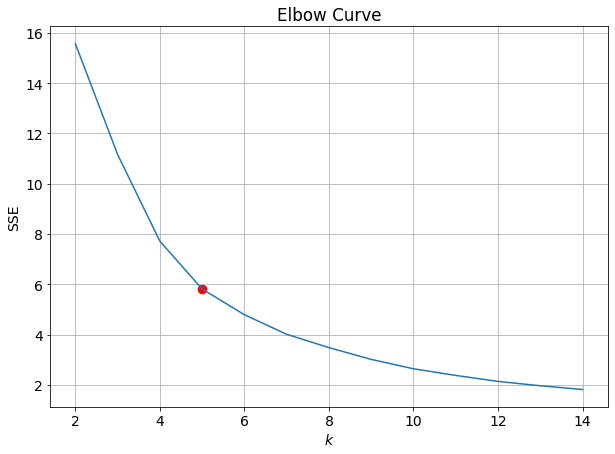

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 7)
rcParams['font.size'] = 14


plt.plot(range(2, 15), sse)
plt.scatter(5, sse[3], s=75, marker='o', color='red')
plt.title("Elbow Curve")
plt.xlabel("$k$")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

The resulting graph shows that the optimal value of $k$ is 5.

In [ ]:
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

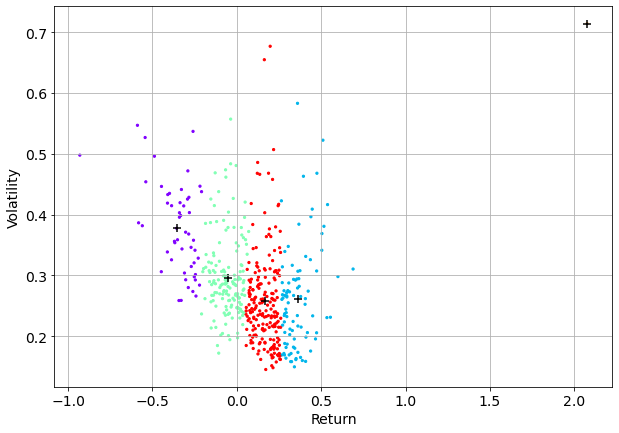

In [ ]:
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap ="rainbow", s=5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=75, color='black', label='centroids')
plt.grid(True)
plt.xlabel("Return")
plt.ylabel("Volatility")
plt.show()

We can view the presence of outliers as only one point is on the upper right side of the graph. This outlier form its own cluster. In order to have a better categorization of the stocks within the SP500 index, we would remove those stocks and fit the model another time.

This is done by finding the stock with the highest standard deviation value and dropping the corresponding columnn.

In [ ]:
stdOrder = ret_var.sort_values('Standard Deviation', ascending=False)
first_symbol = stdOrder.index[0]
ret_var.drop(first_symbol, inplace=True)

Then we can fit the dataset again.

In [ ]:
X = ret_var.values
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

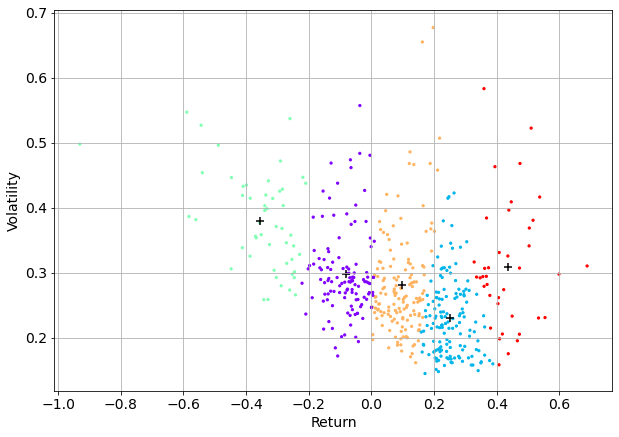

In [ ]:
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap ="rainbow", s=5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=75, color='black', label='centroids')
plt.grid(True)
plt.xlabel("Return")
plt.ylabel("Volatility")
plt.show()

Finally we will assign to each stock it correspondent number of cluster(1,2,3,4,and 5) and make a dataframe with this information. Having the information of cluster number for each stock, we can create a diversified portfolio in the long term, between stocks from different clusters.

In [ ]:
stocks = pd.DataFrame(ret_var.index) # the dataframe structure allow concatenation
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
stockClusters.columns = ['Symbol','Cluster']


As an example the following are the stocks belonging to cluster number 0.

In [ ]:
print (stockClusters.loc[stockClusters['Cluster'] == 0, 'Symbol'])

0       MMM
2      ABBV
8       AAP
14      ALK
24     AMZN
       ... 
486      WY
488     WMB
490    WYNN
493     XYL
497    ZION
Name: Symbol, Length: 118, dtype: object


### Natual Language Processing

K-means algorithmm can also be used in Natural Language Processing (NLP) which is a subfield of artificial intelligence concerned with the interactions between computers and human language, in particular copes with the analysis of large amounts of natural language data.

In there words (or sentences) are transformed into a set of numbers which then can be clustered together with k-means methods for a sentiment analysis.